#### Solucion de la ecuacion diferencial
Encuentre $ V(t) $ asumiedo que el circuito esta con
el interruptor cerrado para $ 0 < t < 2 $ y con el interruptor
abierto para $ t>2 $. ASuma tambien que el capacitor


Iniciamos importando las librerias necesarias


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Seleccione los valores para $ R_{1} $, $ R_{2} $ y $ C $, con $ R_{1} \neq R_{2} $

$ C\frac{dV_{c}}{dt} = \left\{ \begin{array}\\ \frac{5}{R_{1}}-\frac{R_{1}+R_{2}}{R_{1}R_{2}} V_{c} \\ -\frac{1}{R_{2}} V_{c} \\ \end{array} \right. $

$$ V_{c}(t) = \left\{ \begin{array}\\ \frac{10}{3}-\frac{10}{3} e^{-\frac{3}{2}t} & \mbox{if } \ 0<x<2 \ \\ 8.61e^{-\frac{t}{2}} & \mbox{if } \ x>2 \ \\ \end{array} \right. $$

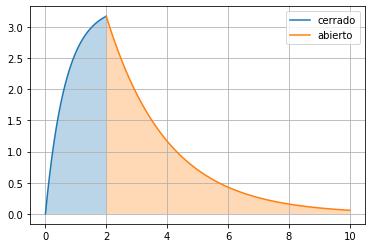

3.167376438773787


In [5]:
def gra():
    t1 = np.linspace(0, 2, 1000)
    t2 = np.linspace(2, 10, 1000)

    Vc_cerrado = (10/3) - (10/3)*np.exp(-(3/2)*t1)
    Vc_abierto = 8.61*np.exp(-t2/2)

    fig, ax1 = plt.subplots()

    ax1.plot(t1, Vc_cerrado, label='cerrado')
    ax1.plot(t2, Vc_abierto, label='abierto')
    ax1.fill_between(t1,Vc_cerrado, alpha=0.3)
    ax1.fill_between(t2,Vc_abierto, alpha=0.3)
    ax1.legend()
    ax1.grid()

    plt.show()
    print(Vc_cerrado[-1])
gra()



#### Comparacion de resultados con OpenModelica


In [6]:
#df = pd.read_csv()

